<a href="https://colab.research.google.com/github/USE-Computer-Science/lectures/blob/main/trials/%D0%A1hronology.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Пример 1. Камера хранения в аэропорту**

В аэропорту есть камера хранения из K ячеек, которые пронумерованы натуральными числами, начиная с 1. Принимаемый багаж кладется в свободную ячейку с минимальным номером. Известно время, когда пассажиры желают сдать и забрать свой багаж (в минутах с начала суток). Ячейка доступна для багажа, начиная со следующей минуты, после окончания срока хранения. Если свободных ячеек не находится, то багаж в камеру хранения не принимается.

Найдите количество багажа, которое будет сдано в камеры за 24 часа и номер ячейки, в которую сдаст багаж последний пассажир.

**Входные данные**

В первой строке [входного файла](https://kompege.ru/files/i8rvpGJ_d.txt) находится число K – количество ячеек в камере хранения, во второй строке файла число N – количество пассажиров, сдающих багаж (натуральное число, не превышающее 1000). Каждая из следующих N строк содержит два натуральных числа, не превышающих 1440: время сдачи багажа и время выдачи багажа.

**Выходные данные**

Программа должна вывести два числа: количество сданных в камеру хранения багажей и номер ячейки, в которую попадёт на хранение последний принятый багаж.

**Типовой пример организации данных:**

2

5

30 60

40 60

50 1110

61 1010

1100 1440

Для указанного примера багаж смогут сдать первый, второй, четвёртый и пятый пассажир. Последний пассажир сдаст свой багаж в ячейку 1, так как к этому моменту и первая и вторая ячейка будут свободны.

**Ответ:** 586 3

In [ ]:
f = open('26.txt')
k = int(f.readline())
n = int(f.readline())
#k, n = map(int,f.readline().split())


# список багажей [время попытки сдачи, время возвращения]
bags = []
# считываем данные по заявкам на сдачу багажей
for i in range(n):
  bags += [list(map(int,f.readline().split()))]
# упорядочиваем время сдачи в хронологическом порядке
bags = sorted(bags)
# на случай сохранения очерёдности в файле
#bags = sorted(bags, key = lambda x: x[0])

# список камер хранения (в каждой ячейке хранится время её очередного освобождения)
cells = [0]*k

# строго говоря, освобождать ячейки для поиска свободной ячейки не обязательно

# функция сдачи багажа в камеру хранения
# в первую по индексу ячейку, время хранения багажа в которой меньше времени сдачи текущего багажа
# записывается время завершения хранения текущего багажа
def put(bag):
  for i in range(k): # k = len(cells)
    # если время хранения багажа в ячейке к текущей минуте уже истекло 
    if cells[i] < bag[0]:
      # записываем в эту ячейку время завершения хранения текущего багажа
      cells[i] = bag[1]
      # возвращаем индекс ячейки, в которую удалось сдать багаж (начиная с нуля)
      return i
  # если ни одной свободной ячейки не нашлось - возвращаем -1
  return -1  


# суммарное количество принятых на хранение багажей 
cnt = 0
# индекс ячейки, в которую удалось положить последний багаж 
last_index = 0

# обходим список багажей
for bag in bags:
  # пробуем сдать багаж
  index = put(bag)
  # если багаж принят на хранение
  if index != -1:
    # увеличиваем счётчик сданных багажей
    cnt += 1
    # сохраняем индекс ячейки, в которую удалось положить текущий багаж 
    last_index = index
# печатаем ответ
print(cnt, last_index+1) # т.к. индексы ячеек в условии начинаются с 1

586 3


**Пример 2. Распределение клиентов банка по свободным операторам**

В фойе банка расположен терминал электронной очереди, который выдаёт каждому прибывающему посетителю талон с номером одного из K окон обслуживания. Окна обслуживания пронумерованы натуральными числами, начиная с единицы. Если на момент прибытия очередного посетителя свободно несколько окон обслуживания – терминал указывает в талоне окно с минимальным номером. Для каждого посетителя известно время прибытия (в минутах с начала суток) и время, необходимое на его обслуживание (в минутах). Окно обслуживания готово к приёму следующего посетителя, начиная с той же минуты, в которую закончило обслуживание предыдущего посетителя. Если  на момент прибытия очередного посетителя свободных окон не находится, терминал выдаёт посетителю специальный талон с рекомендацией вернуться через T минут и попробовать записаться ещё раз (где T – время в минутах, через которое появится первое свободное окно).

Будем считать, что ни один посетитель, получивший специальный талон не стал возвращаться в банк и пробовать получить талон снова. Определите количество посетителей, которые будут обслужены за 24 часа и максимальное время ожидания T, которое терминал укажет в специальном талоне.

**Входные данные**

В первой строке [входного файла](https://kompege.ru/files/i8rvpGJ_d.txt) находится число K – количество окон обслуживания в банке, во второй строке файла число N – количество посетителей банка (натуральное число, не превышающее 1000). Каждая из следующих N строк содержит два натуральных числа, не превышающих 1440: время прибытия посетителя и время его обслуживания.

**Выходные данные**

Программа должна вывести два числа: количество посетителей, которые будут обслужены за 24 часа и максимальное время ожидания (в минутах), которое терминал укажет в специальном талоне.

**Ответ:** 859 5

In [ ]:
f = open('26-2.txt')
k = int(f.readline())
n = int(f.readline())
#k, n = map(int,f.readline().split())


# список посетителей [время прихода, время завершения обслуживания]
guests  = []
# считываем данные по времени прихода и ухода посетителей
for i in range(n):
  start, dur = map(int,f.readline().split())
  guests.append([start, start + dur])
# упорядочиваем время прихода в хронологическом порядке
guests = sorted(guests)

# список окон обслуживания (в каждом окне хранится время его очередного освобождения)
windows = [0]*k

# строго говоря, освобождать окна для поиска первого свободного окна не обязательно

# функция выдачи талона с номером соответствующего окна (либо специального талона)
# в первое по индексу окно, время завершения обслуживания в котором меньше времени прихода текущего клиента
# записывается время завершения обслуживания текущего клиента
def assign(guest):
  for i in range(k): # k = len(windows)
    # если время обслуживания клиента в текущем окне уже истекло 
    if windows[i] <= guest[0]:
      # записываем в это окно время завершения обслуживания текущего клиента
      windows[i] = guest[1]
      # возвращаем 0 (в данной задаче - признак выдачи клиенту талона с номером окна)
      return 0
  # если ни одного свободного окна не нашлось - возвращаем время ожидания
  return min(windows) - guest[0]


# суммарное количество обслуженных клиентов
cnt = 0
# максимальное время ожидания 
max_delay = 0

# обходим список клиентов
for guest in guests:
  # пробуем записать клиента в свободное окно
  delay = assign(guest)
  # если клиент принят без задержки
  if delay == 0:
    # увеличиваем счётчик обслуженных клиентов
    cnt += 1
  # если клиент получил специальный талон
  else:
    # обновляем максимальное время ожидания, указанное в специальном талоне
    max_delay = max(delay, max_delay)
# печатаем ответ
print(cnt, max_delay)

859 5


**Пример 3. Расписание мероприятий в конференц-залах отеля**


В отеле есть K одинаковых по стоимости и вместимости конференц-залов, которые пронумерованы натуральными числами, начиная с 1. Организации бронируют конференц-залы (при бронировании автоматически выбирается свободный в указанное время зал с минимальным номером). Для каждой организации известно время начала и окончания мероприятия (в минутах с начала суток), для проведения которого организация пытается забронировать конференц-зал. После проведения каждого мероприятия в зале производится обязательная пятнадцатиминутная уборка (начало очередного бронирования зала должно не менее чем на 15 минут превышать время завершения предыдущего бронирования). Если 2 организации подают заявку на проведение мероприятия в одно и то же время – первой рассматривается заявка, поступившая раньше (находящаяся в более ранней строке файла с исходными данными). Если на указанное в заявке время начала мероприятия свободных конференц-залов нет – заявка отклоняется.

Определите количество мероприятий, которые пройдут в конференц-залах отеля за 24 часа и номер конференц-зала, который пример последнее мероприятие.

**Входные данные**

В первой строке [входного файла](https://kompege.ru/files/i8rvpGJ_d.txt) находится число N – количество заявок на проведение мероприятий, поданных организациями (натуральное число, не превышающее 1000), во второй строке файла число K – количество конференц-залов в отеле. Каждая из следующих N строк содержит два натуральных числа, не превышающих 1440: время начала и завершения мероприятия, которое планирует провести организация.

**Выходные данные**

Программа должна вывести два числа: количество мероприятий, которые пройдут в конференц-залах отеля за 24 часа и номер конференц-зала, в котором пройдёт последнее мероприятие.


**Ответ:** 387 6

In [ ]:
f = open('26-3.txt')
n = int(f.readline())
k = int(f.readline())

# список заявок на проведение мероприятий [время начала, время завершения бронирования зала]
reqs = []
# считываем данные по времени начала и завершения бронирования, указанным в заявках
for i in range(n):
  reqs.append(list(map(int,f.readline().split())))
# упорядочиваем время бронирования в хронологическом порядке
reqs = sorted(reqs, key = lambda x: x[0])

# список конференц-залов (в каждом зале хранится время его очередного освобождения)
halls = [0]*k

# функция бронирования первого свободного конференц-зала
# в первый по индексу зал, время завершения бронирования которого меньше времени начала бронирования в текущей заявке + 15 минут
# записывается время завершения бронирования, указанное в текущей заявке
def book(req):
  for i in range(k): # k = len(reqs)
    # если время бронирования и уборки текущего зала уже истекло 
    if halls[i] + 15 <= req[0]:
      # записываем в текущий зал время завершения мероприятия, указанное в текущей заявке
      halls[i] = req[1]
      # возвращаем индекс зала, в котором пройдёт текущее мероприятие
      return i+1 # т.к. залы нумеруются с единицы
  # если ни одного свободного зала не нашлось - заявка отклоняется
  return 0


# суммарное количество проведённых мероприятий
cnt = 0
# индекс зала, в котором пройдёт последнее мероприятие
last_index = 0

# обходим список заявок
for req in reqs:
  # пробуем забронировать под мероприятие зал
  index = book(req)
  # если зал удалось забронировать
  if index:
    # увеличиваем счётчик проведённых мероприятий
    cnt += 1
    # сохраняем индекс зала, в котором пройдёт текущее мероприятие 
    last_index = index
# печатаем ответ
print(cnt, last_index)

387 6


**Пример 4. Карусели и количество билетов**

В парке развлечений есть аттракцион, рассчитанный на K человек. Время сеанса аттракциона – 10 минут. Пауза между сеансами – 3 минуты. Аттракцион начинает приём посетителей в 7:00 (первый сеанс начинается в 7:13) и завершает работу в 23:40 (последний сеанс начинается в 23:28). Известно время (в минутах с начала рабочего дня), когда посетители подходят к аттракциону, чтобы попасть на следующий сеанс. Если посетитель пришёл в минуту начала очередного сеанса - считается, что он успел на сеанс. Если начала следующего сеанса ожидают более K посетителей – на аттракцион попадают пришедшие раньше по времени первые K человек (остальные уходят так и не прокатившись).

Найдите количество пассажиров, которым удалось прокатиться на аттракционе за рабочий день и время (в минутах с начала рабочего дня) прихода последнего пассажира, которому удалось попасть на сеанс.

**Входные данные**

В первой строке [входного файла](https://kompege.ru/files/i8rvpGJ_d.txt) находится число K – вместимость аттракциона, во второй строке файла число N – количество посетителей аттракциона за рабочий день (натуральное число, не превышающее 1000). Каждая из следующих N строк содержит натуральное число, не превышающее 1000: время прихода очередного пассажира (в минутах с начала рабочего дня).

**Выходные данные**

Программа должна вывести два числа: количество пассажиров, которым удалось прокатиться на аттракционе за рабочий день и время прихода последнего пассажира, которому удалось попасть на сеанс.



In [ ]:
f = open('26-4.txt')
n = int(f.readline())
k = int(f.readline())

# список времён прихода посетителей на аттракцион
arrs = []
# считываем данные по времени прибытия посетителей
for i in range(n):
  arrival = int(f.readline())
  session_start = (arrival // 13 + 1) * 13
  arrs.append([arrival, session_start])
# упорядочиваем время бронирования в хронологическом порядке
arrs = sorted(arrs)

cnt = 0
session_start = 13
capacity = 0
for arr in arrs:
  if capacity <= k and arr[1] == session_start:
    capacity += 1
  else:
    capacity = 0
    session_start += 13 


**Пример 5. Тренажёрный зал**

В тренажёрном зале N тренажёров, работающих c 10:00 до 22:00. Все тренажёры пронумерованы от 1 до N. Каждый из M посетителей зала может воспользоваться любым тренажёром. Посетитель всегда выбирает свободный тренажёр с наименьшим номером. если свободных тренажёров нет, он уходит. Если в одно и то же время пришли несколько посетителей, то они занимают тренажёры в том порядке, в котором расположены данные в файле. Для каждого посетителя известно время начала и время окончания его тренировки. Время тренировки на тренажёре другого посетителя может начаться со следующей минуты после окончания времени тренировки предыдущего посетителя.

Определите количество посетителей тренажерного зала, которые могли воспользоваться тренажёрами за время работы зала и номер тренажёра, на котором начал свою тренировку последний посетитель.

**Входные данные**

В первой строке входных данных задается два числа: N – количество тренажёров и M – количество посетителей зала. В каждой из последующих M строк содержится информация по каждому посетителю: время начала и время окончания тренировки на тренажёре (в минутах от начала суток).

**Выходные данные**

Запишите в ответе два числа: сначала количество посетителей тренажерного зала, которые смогли воспользоваться тренажёрами за время работы зала, затем номер тренажёра, на котором проводил свою тренировку последний посетитель.

**Пример входного файла:**

2 5

601 690

620 642

640 645

650 670

680 700

При этих исходных данных 1-й тренажёр с самого начала занимает первый посетитель. Посетители со временем прихода 620, 650 и 680 работают один за другим на 2-м тренажёре. Посетитель со временем прихода 640 уходит, потому что в этот момент свободных тренажёров нет. Всего обслужено 4 посетителя, последний начал работу на тренажёре с номером 2. 

Ответ для примера: 4 2.

**Ответ:** 1269 41

In [ ]:
f = open('26-4-5.txt')
n, m = map(int,f.readline().split())


# список посетителей [время попытки занятия тренажёра, время освобождения тренажёра]
guests = []
# считываем данные по заявкам на тренажёры
for i in range(m):
  guests += [list(map(int,f.readline().split()))]

# упорядочиваем время занятия тренажёра в хронологическом порядке
guests = sorted(guests, key = lambda x: x[0])

# список тренажёров (в каждой ячейке хранится время её очередного освобождения)
cells = [0]*n

# функция занятия тренажёра
# в первый по индексу тренажёр, время занятия на котором меньше времени прихода текущего посетителя
# записывается время завершения занятия текущего посетителя
def put(guest):
  for i in range(n): # n = len(cells)
    # если время занятия на текущем тренажёре уже истекло 
    if cells[i] < guest[0]:
      # записываем в этот тренажёр время завершения занятия текущего посетителя
      cells[i] = guest[1]
      # возвращаем индекс тренажёра, на котором удалось позаниматься (начиная с нуля)
      return i
  # если ни одного свободного тренажёра не нашлось - возвращаем -1
  return -1  


# суммарное количество посетителей с удачным бронированием тренажёра
cnt = 0
# индекс тренажёра, который удалось забронировать последним
last_index = 0

# обходим список посетителей
for guest in guests:
  # пробуем занять тренажёр
  index = put(guest)
  # если тренажёр удалось забронировать
  if index != -1:
    # увеличиваем счётчик успешно отзанимавшихся посетителей
    cnt += 1
    # сохраняем индекс тренажёра, который удалось занять текущему посетителю
    last_index = index
# печатаем ответ
print(cnt, last_index+1) # т.к. индексы ячеек в условии начинаются с 1

1269 41


**Пример 6. Очередь в банкоматы**

В операционном зале есть N банкоматов, работающих круглосуточно. Все банкоматы пронумерованы. В течение дня M клиентов хотят воспользоваться банкоматом. Клиенты обслуживаются в порядке общей очереди. Если в один момент подошли несколько клиентов, то они становятся в очередь в порядке расположения данных в файле. Клиент, стоящий первым в очереди, подходит к первому освободившемуся банкомату (если таких несколько – к банкомату с наименьшим номером). Обслуживание очередного клиента может начаться в ту же минуту, когда банкомат станет свободным. Известно время в минутах от начала суток, когда клиент зашёл в зал, и время его обслуживания.

Определите количество клиентов, которые были обслужены банкоматами за 24 часа и номер банкомата, в котором обслуживался последний клиент. Последним обслуженным клиентом считается тот, который подошёл к банкомату до окончания суток (его обслуживание могло закончиться в следующие сутки).

**Входные данные** 

В первой строке входных данных находятся два числа: N – количество банкоматов и M – количество клиентов. В каждой из последующих M строк содержится информация по одному клиенту: время начала обслуживания клиента (в минутах с начала суток) и время обслуживания (в минутах).

**Выходные данные**

Запишите в ответе два числа: сначала количество клиентов, которые смогут воспользоваться банкоматом, затем номер банкомата, в котором обслуживался последний клиент.

**Пример входного файла:**

2 5

1 8

6 12

8 4

8 14

8 9

Пусть максимальное время обслуживания равно 15 минутам. При таких исходных данных клиенты обслуживаются следующим образом. 1-й банкомат: клиенты со временем обслуживания 8, 4, 14; 2-й банкомат: клиент со временем обслуживания 12. Клиента со временем 9 обслужить за 15 минут не удаётся. Последний обслуженный клиент (со временем 14) начинает работу с 1-м банкоматом на 13-й минуте. 

Ответ для примера: 4 1.

**Ответ:** 1591 4

In [ ]:
f = open('26-4-6.txt')
n, m = map(int,f.readline().split())


# список посетителей [время прихода, время завершения обслуживания]
guests  = []
# считываем данные по времени прихода и времени обслуживания посетителей
for i in range(m):
  start, dur = map(int,f.readline().split())
  guests.append([start, dur])
# упорядочиваем время прихода в хронологическом порядке
guests = sorted(guests, key = lambda x: x[0])

# список банкоматов (в каждом хранится время его очередного освобождения)
atms = [0]*n

# функция назначения банкомату с соответствующим номером текущего клиента
# в первый по индексу освободившийся банкомат записывается время завершения обслуживания текущего клиента
def assign(guest):
  # если в текущие сутки клиент не успеет подойти к банкомату:
  if min(atms) > 1440:
    # возвращаем признак завершения
    return -1
  for i in range(n):
    # если время обслуживания клиента в текущем банкомате уже истекло 
    if atms[i] <= guest[0]:
      # записываем в этот банкомат время завершения обслуживания текущего клиента
      atms[i] = max(atms[i], guest[0]) + guest[1]
      # возвращаем номер банкомата, в котором будет обслужен текущий клиент
      return i + 1
  
  # если ни одного свободного банкомата на момент прихода не нашлось
  # находим индекс банкомата, который освободится первым
  i = atms.index(min(atms))
  # записываем в этот банкомат время завершения обслуживания текущего клиента
  atms[i] = max(atms[i], guest[0]) + guest[1]
  # и возвращаем номер банкомата, в котором будет обслужен текущий клиент
  return i + 1


# суммарное количество обслуженных клиентов
cnt = 0
# номер банкомата последнего клиента
last_id = 0

# обходим список клиентов
for guest in guests:
  # пробуем назначить клиенту банкомат
  id = assign(guest)
  # если клиент успел попасть к банкомату до завершения суток
  if id != -1:
    # увеличиваем счётчик обслуженных клиентов
    cnt += 1
    last_id = id
  # если клиент не успевает до конца суток - не успеют и остальные клиенты
  else:
    break

# печатаем ответ
print(cnt, last_id)

1591 4


**Пример 7. Очередь в конкретный банкомат**

В операционном зале есть N банкоматов, работающих круглосуточно. Все банкоматы пронумерованы. В течение дня M клиентов хотят воспользоваться банкоматом. Клиенты обслуживаются в порядке общей очереди. Если в один момент подошли несколько клиентов, то они становятся в очередь в порядке расположения данных в файле. Клиент, стоящий первым в очереди, подходит к первому освободившемуся банкомату (если таких несколько – к банкомату с наименьшим номером). Обслуживание очередного клиента может начаться в ту же минуту, когда банкомат станет свободным. Известно время в минутах от начала суток, когда клиент зашёл в зал, и время его обслуживания.

Определите наименьшее количество клиентов, которые были обслужены одним банкоматом за 24 часа, и время начала обслуживания последнего клиента этим банкоматом. Последним обслуженным клиентом считается тот, который подошёл к банкомату до окончания суток (его обслуживание могло закончиться в следующие сутки).

**Входные данные** 

В первой строке входных данных находятся два числа: N – количество банкоматов и M – количество клиентов. В каждой из последующих M строк содержится информация по одному клиенту: время начала обслуживания клиента (в минутах с начала суток) и время обслуживания (в минутах).

**Выходные данные**

Запишите в ответе два числа: сначала количество клиентов, которые смогут воспользоваться банкоматом, затем номер банкомата, в котором обслуживался последний клиент.

**Пример входного файла:**

2 5

1 8

6 12

8 4

8 14

8 9

При таких исходных данных наименьшее число клиентов (2) обслужит 2-й банкомат: это клиенты со временем обслуживания 12 и 9. Последний из них начинает работу с банкоматом на 18-й минуте. 

Ответ для примера: 2 18.

**Ответ:** 75 1443

In [ ]:
f = open('26-4-6.txt')
n, m = map(int,f.readline().split())


# список посетителей [время прихода, время завершения обслуживания]
guests  = []
# считываем данные по времени прихода и времени обслуживания посетителей
for i in range(m):
  start, dur = map(int,f.readline().split())
  guests.append([start, dur])
# упорядочиваем время прихода в хронологическом порядке
guests = sorted(guests, key = lambda x: x[0])

# список банкоматов (в каждом хранится время его очередного освобождения)
atms = [0]*n
# количества клиентов, которых обслужил каждый банкомат
atms_cnt = [0]*n

# функция назначения банкомату с соответствующим номером текущего клиента
# в первый по индексу освободившийся банкомат записывается время завершения обслуживания текущего клиента
def assign(guest):
  # если в текущие сутки клиент не успеет подойти к банкомату:
  if min(atms) > 1440:
    # возвращаем признак завершения
    return -1
  for i in range(n):
    # если время обслуживания клиента в текущем банкомате уже истекло 
    if atms[i] <= guest[0]:
      # записываем в этот банкомат время завершения обслуживания текущего клиента
      atms[i] = max(atms[i], guest[0]) + guest[1]
      # увеличиваем число обслуженных клиентов этим банкоматом на 1
      atms_cnt[i] += 1
      # возвращаем номер банкомата, в котором будет обслужен текущий клиент
      return i + 1
  
  # если ни одного свободного банкомата на момент прихода не нашлось
  # находим индекс банкомата, который освободится первым
  i = atms.index(min(atms))
  # записываем в этот банкомат время завершения обслуживания текущего клиента
  atms[i] = max(atms[i], guest[0]) + guest[1]
  # увеличиваем число обслуженных клиентов этим банкоматом на 1
  atms_cnt[i] += 1
  # и возвращаем номер банкомата, в котором будет обслужен текущий клиент
  return i + 1

# обходим список клиентов
for guest in guests:
  # пробуем назначить клиенту банкомат
  id = assign(guest)
  # если клиент не успел попасть к банкомату до завершения суток
  if id == -1:
    break

# суммарное количество обслуженных клиентов
min_cnt = min(atms_cnt)
# номер банкомата последнего клиента
last_time = atms[atms_cnt.index(min_cnt)]

# печатаем ответ
print(min_cnt, last_time)

75 1443


**Пример 8. Парикмахерский салон**

В парикмахерской работают K специалистов. У каждого специалиста есть свой номер, начиная с единицы. Администратору парикмахерской нужно записать N клиентов на следующий день. Известно время, в которое каждый клиент хочет прийти в парикмахерскую, и в какое время он хочет завершить прием. Администратор записывает клиента к специалисту с наименьшим номером, который свободен в тот промежуток, который нужен клиенту. Специалисты могут принимать клиентов со следующей минуты после предыдущего клиента. Если свободных специалистов на желаемое время нет, то администратор просит прощения у клиента и сообщает, что он не может записать его.

Длительность рабочего дня парикмахерской составляет 600 минут.

Определите сколько клиентов смог записать администратор и номер специалиста, к которому записался предпоследний клиент.

**Входные данные**

В первой строке входного файла находится число K – количество специалистов в парикмахерской (натуральное число, не превышающее 1000). Во второй строке находится число N – количество клиентов, которые хотят записаться. В следующих N строках находятся два значения: минута с которой клиент хочет записаться и минута, когда он планирует покинуть салон, отсчёт ведётся от начала рабочего дня парикмахерской (все числа положительные, не превышающие 600). Данные в файле приведены в том порядке, в котором клиенты звонили в парикмахерскую.

**Выходные данные:**

Запишите в ответе два целых числа: сначала количество клиентов, которое сможет записать администратор, затем номер специалиста, к которому записался предпоследний клиент.

**Пример входного файла**

2

5

30 60

40 50

20 100

40 60

10 30

При таких исходных данных 5 клиентов планируют записаться к 2 парикмахерам. Получится успешно записаться у первого, второго, и пятого клиентов. Предпоследний клиент, которому удастся записаться попадёт ко второму специалисту.

Ответ для примера: 3 2.

**Ответ: 237 8**

In [ ]:
f = open('26-4-8.txt')
k = int(f.readline())
n = int(f.readline())

times = [list(map(int, f.readline().split())) for _ in range(n)]

masters = [[0]*601 for _ in range(k)]

clients = []

for start, end in times:
  for i in range(k):
    if any(masters[i][start:end+1]):
      continue
    clients += [i+1]
    masters[i][start:end+1] = [1]*(end+1 - start)
    break

print(len(clients), clients[-2])
    


237 8


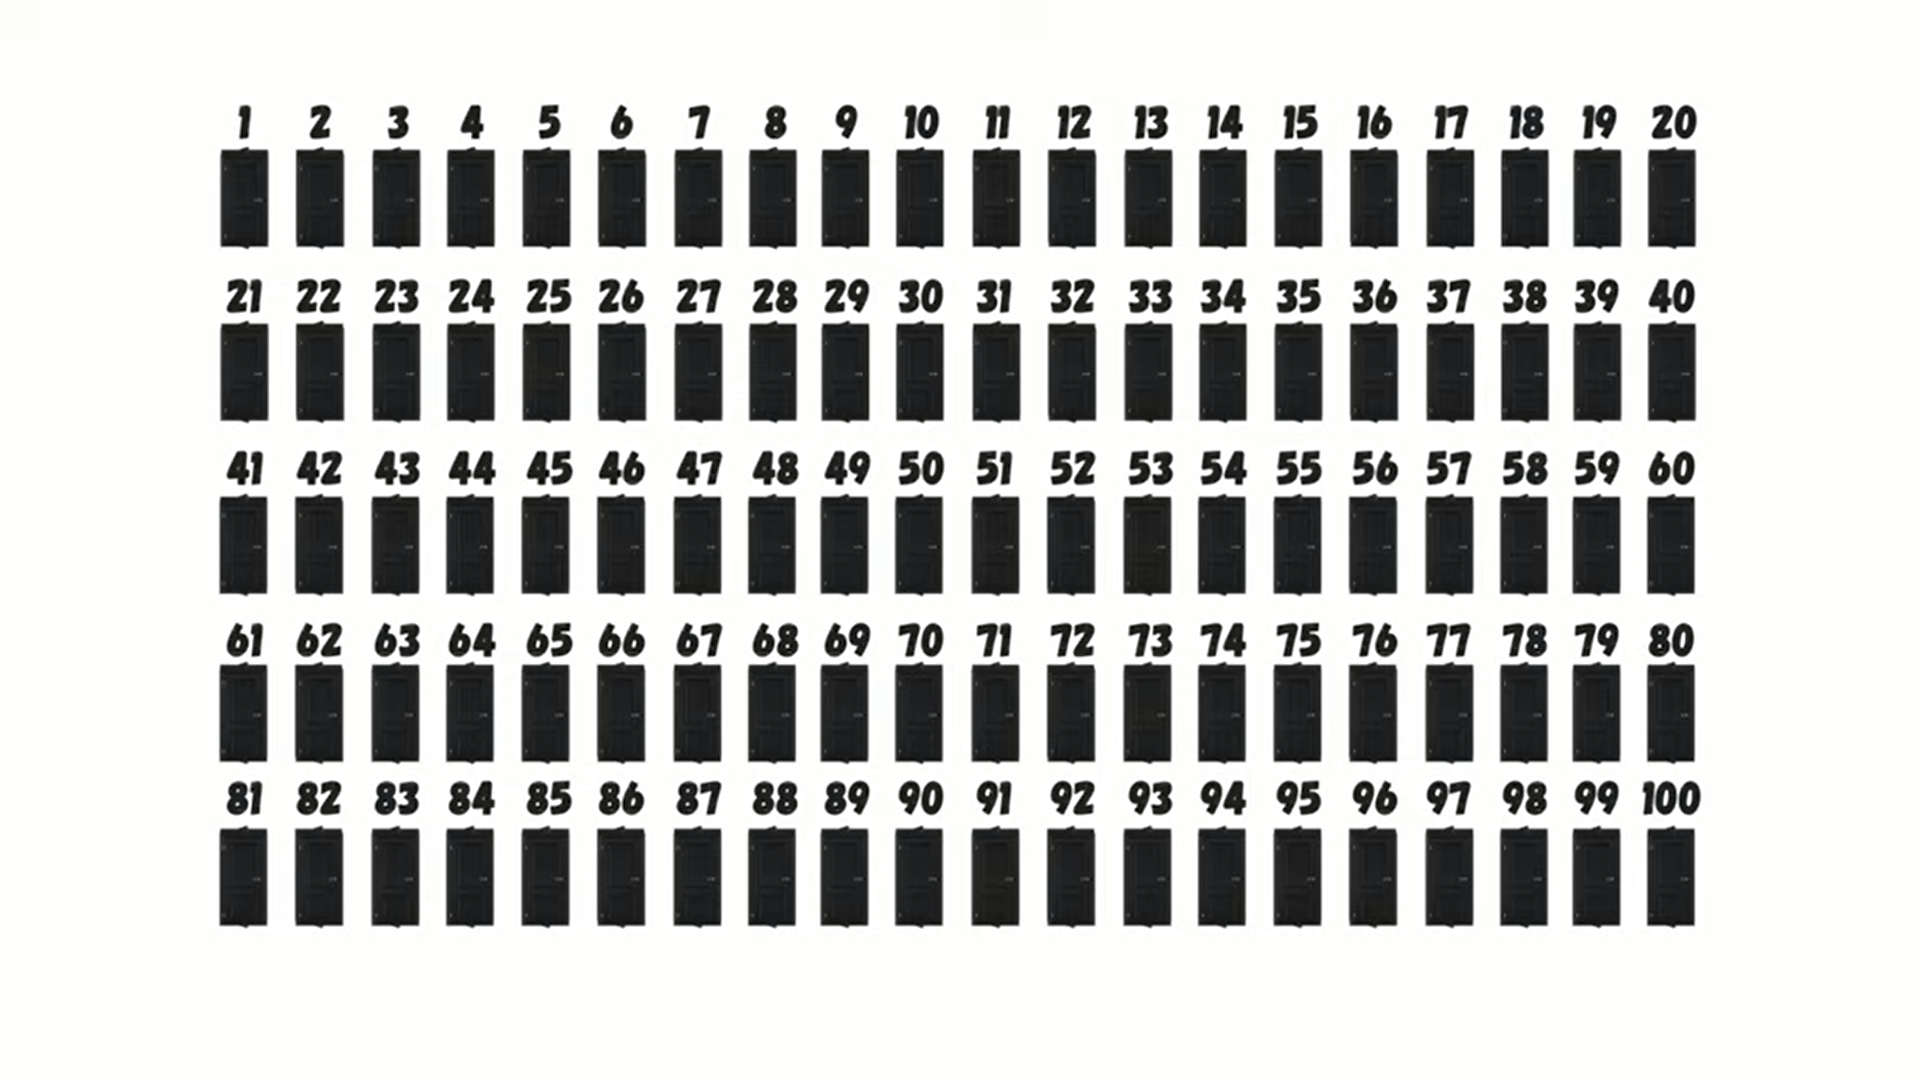